In [4026]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4027]:
df = pd.read_csv('customer_segmentation.csv')

In [4028]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4029]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4030]:
df.shape

(2240, 29)

In [4031]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4032]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4033]:
df.dropna(inplace=True)

In [4034]:
df.isna().sum().sum()

0

In [4035]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [4036]:
df["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [4037]:
df["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [4038]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)

In [4039]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [4040]:
df["Age"] = 2025 - df["Year_Birth"]

In [4041]:
df["Age"]

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2216, dtype: int64

In [4042]:
df["Total_Children"] = df["Kidhome"] + df["Teenhome"]

In [4043]:
df["Total_Children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total_Children, Length: 2216, dtype: int64

In [4044]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children'],
      dtype='object')

In [4045]:
spending_columns = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts","MntSweetProducts","MntGoldProds"]

In [4046]:
df["Total_Spending"] = df[spending_columns].sum(axis=1)

In [4047]:
df["Total_Spending"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Spending, Length: 2216, dtype: int64

In [4048]:
df["Customer_Since"] = (pd.Timestamp("today") - df["Dt_Customer"]).dt.days

In [4049]:
df["Customer_Since"]

0       4708
1       4158
2       4357
3       4184
4       4206
        ... 
2235    4426
2236    4064
2237    4200
2238    4201
2239    4667
Name: Customer_Since, Length: 2216, dtype: int64

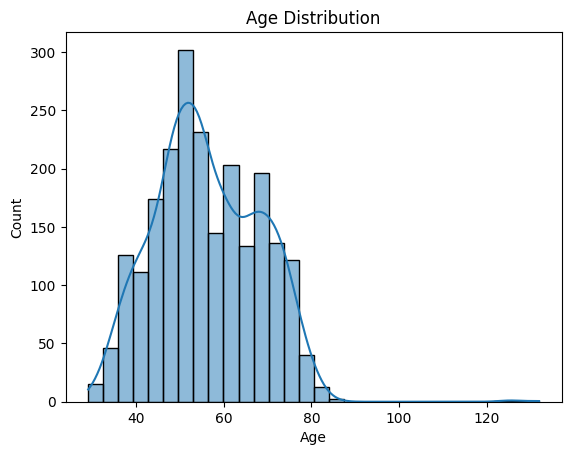

In [4050]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

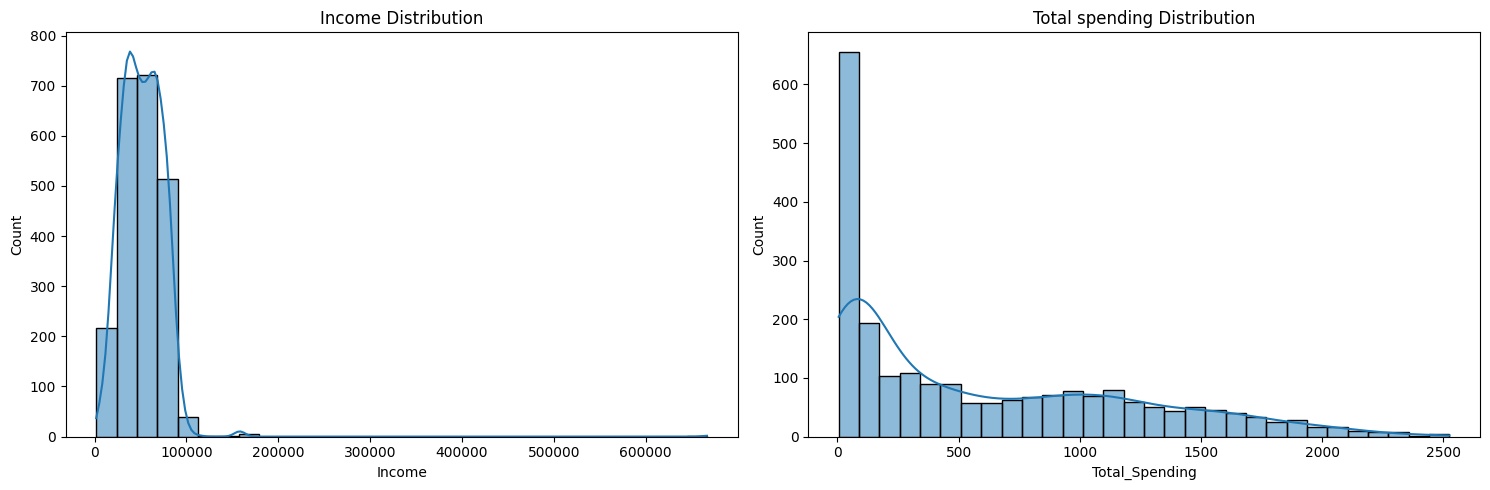

In [4051]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df["Income"], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Income Distribution')

sns.histplot(df["Total_Spending"], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Total spending Distribution')

plt.tight_layout()
plt.show()

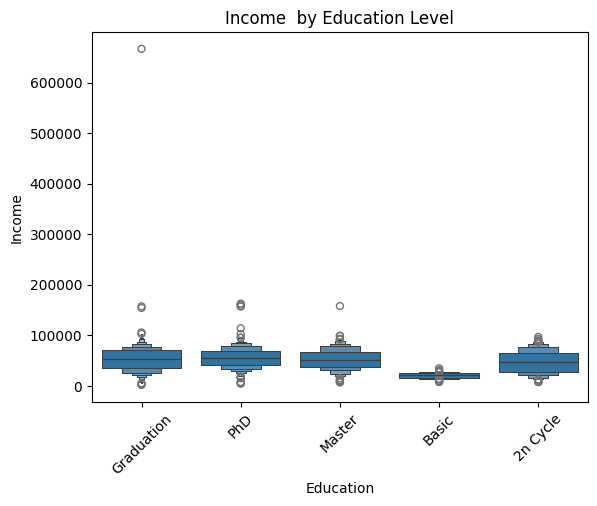

In [4052]:
sns.boxenplot(x="Education", y="Income", data=df)
plt.xticks(rotation = 45)
plt.title("Income  by Education Level")
plt.show()

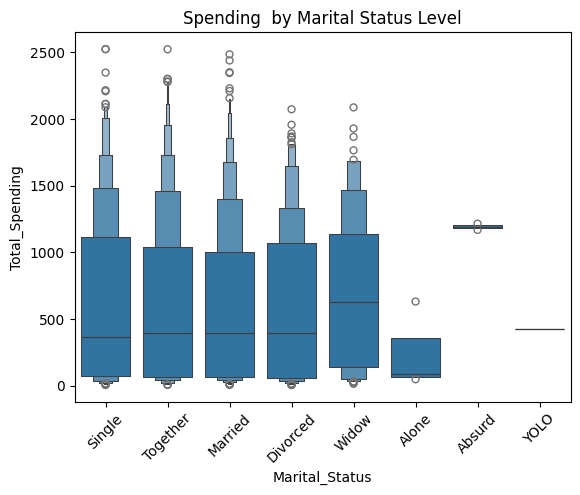

In [4053]:
sns.boxenplot(x="Marital_Status", y="Total_Spending", data=df)
plt.xticks(rotation = 45)
plt.title("Spending  by Marital Status Level")
plt.show()

In [4054]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since'],
      dtype='object')

In [4055]:
corr = df[["Income", "Age", "Recency", "Total_Spending", "NumWebPurchases", "NumStorePurchases"]].corr()
corr

,Income,Age,Recency,Total_Spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434
Total_Spending,0.667576,0.113487,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.387878,0.153051,-0.005641,0.528973,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.675181,0.516240,1.000000


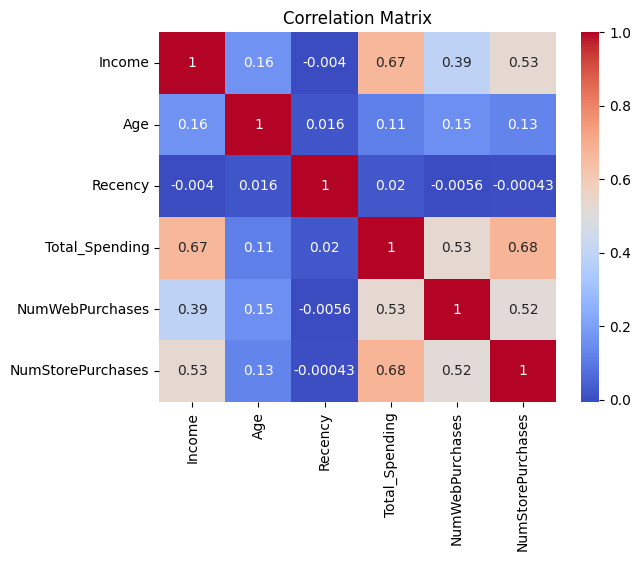

In [4056]:
sns.heatmap(corr, annot= True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [4057]:
pivot_income = df.pivot_table(values="Income", index="Education", columns="Marital_Status", aggfunc="mean")

In [4058]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


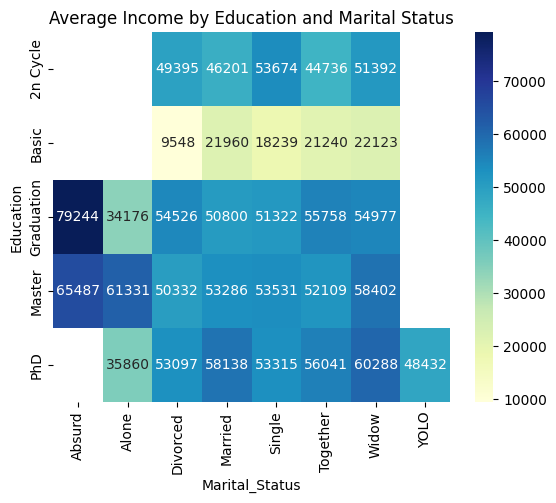

In [4059]:
sns.heatmap(pivot_income, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Income by Education and Marital Status")
plt.show()

In [4060]:
group1 = df.groupby("Education")["Total_Spending"].mean().sort_values(ascending = False)

In [4061]:
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_Spending, dtype: float64

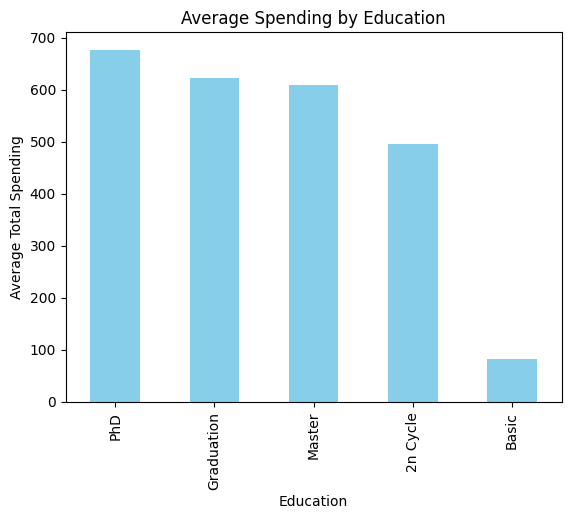

In [4062]:
group1.plot(kind="bar", color = "skyblue")
plt.title("Average Spending by Education")
plt.ylabel("Average Total Spending")
plt.show()

In [4063]:
df["AcceptedAny"] = df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]].sum(axis = 1)

In [4064]:
df["AcceptedAny"].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [4065]:
df["AcceptedAny"] = df["AcceptedAny"].apply(lambda x: 1 if x > 0 else 0)

In [4066]:
df["AcceptedAny"].unique()

C:\Users\Rafal\AppData\Roaming\Python\Python312\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


array([1, 0], dtype=int64)

In [4067]:
group2 = df.groupby("Marital_Status")["AcceptedAny"].mean().sort_values(ascending=False)

In [4068]:
group2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: AcceptedAny, dtype: float64

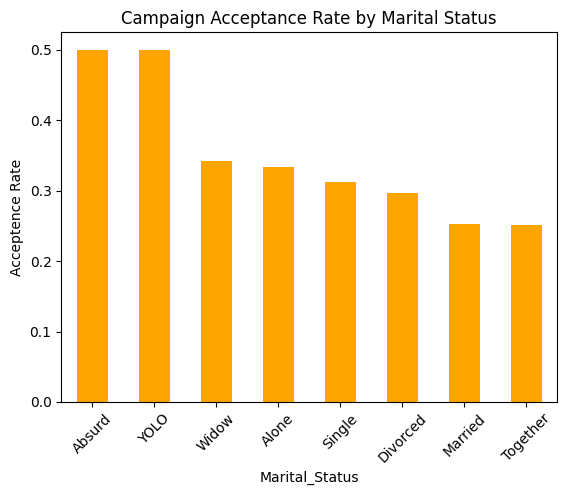

In [4069]:
group2.plot(kind="bar", color = "orange")
plt.title("Campaign Acceptance Rate by Marital Status")
plt.ylabel("Acceptence Rate")
plt.xticks(rotation = 45)
plt.show()

In [4070]:
bins = [18, 30, 40, 50, 60, 70, 90]

In [4071]:
labels = ["18-29", "30-39","40-49", "50-59", "60-69", "70+"]

In [4072]:
df["AgeGroup"] = pd.cut(df["Age"], bins = bins, labels=labels)

In [4073]:
df["AgeGroup"]

0       60-69
1         70+
2       50-59
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: AgeGroup, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [4074]:
group3 = df.groupby("AgeGroup")["Income"].mean()

C:\Users\Rafal\AppData\Local\Temp\ipykernel_14796\1140876350.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby("AgeGroup")["Income"].mean()


In [4075]:
group3

AgeGroup
18-29    46658.000000
30-39    46283.028302
40-49    49224.877034
50-59    50812.913303
60-69    56200.827887
70+      58944.316294
Name: Income, dtype: float64

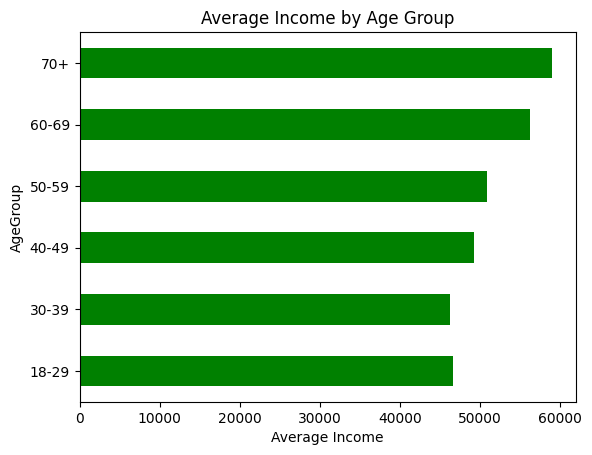

In [4076]:
group3.plot(kind="barh", color = "green")
plt.title("Average Income by Age Group")
plt.xlabel("Average Income")
plt.show()

In [4077]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,68,0,1617,4708,1,60-69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,71,2,27,4158,0,70+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,60,0,776,4357,0,50-59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,41,1,53,4184,0,40-49
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,44,1,422,4206,0,40-49


In [4078]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'AgeGroup'],
      dtype='object')

In [4079]:
features = ["Age", "Income", "Total_Spending", "NumWebPurchases", "NumStorePurchases", "Recency"]

In [4080]:
X = df[features].copy()

In [4081]:
X

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,Recency
0,68,58138.0,1617,8,4,58
1,71,46344.0,27,1,2,38
2,60,71613.0,776,8,10,26
3,41,26646.0,53,2,4,26
4,44,58293.0,422,5,6,94
...,...,...,...,...,...,...
2235,58,61223.0,1341,9,4,46
2236,79,64014.0,444,8,5,56
2237,44,56981.0,1241,2,13,91
2238,69,69245.0,843,6,10,8


In [4082]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [4083]:
X_scaled = scaler.fit_transform(X)

In [4084]:
X_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812,  1.42855332, -0.55414289,
         0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, -1.12588116, -1.16951781,
        -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985,  1.42855332,  1.29198186,
        -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, -0.76096195,  2.21504423,
         1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438,  0.6987149 ,  1.29198186,
        -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , -0.39604274, -0.55414289,
        -0.31140528]])

In [4085]:
from sklearn.cluster import KMeans

In [4086]:
wcss = []

In [4087]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [4088]:
wcss

[8545.1909071293,
 7756.163905443229,
 6859.31065219907,
 6257.384972879043,
 5894.5477613888,
 5448.561194631615,
 5046.829390825618,
 4657.09746380349]

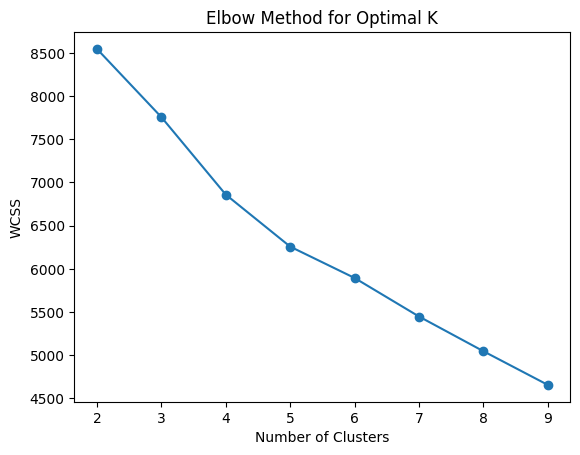

In [4089]:
plt.plot(range(2,10), wcss, marker = "o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [4090]:
kmeans = KMeans(n_clusters=6)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [4091]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1617,4708,1,60-69,2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,27,4158,0,70+,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,776,4357,0,50-59,4
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,53,4184,0,40-49,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,422,4206,0,40-49,3


In [4092]:
cluster_summary = df.groupby("Cluster")[features].mean()

In [4093]:
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,Recency
Cluster,,,,,,
0,50.940840,32636.687023,92.545802,1.958015,3.087786,25.708015
1,46.731343,74309.734328,1354.904478,5.071642,9.274627,40.483582
2,63.249377,68787.648379,1139.204489,5.997506,8.511222,75.291771
3,55.540741,36903.040741,131.768519,2.442593,3.490741,74.924074
4,64.634804,60049.507353,758.870098,6.372549,6.926471,25.830882
5,52.500000,221604.500000,662.125000,0.500000,0.750000,48.625000


In [4094]:
df["Cluster"].value_counts()

Cluster
3    540
0    524
4    408
2    401
1    335
5      8
Name: count, dtype: int64

In [4095]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = pca_data[:,0], pca_data[:,1]

In [4096]:
pca_data

array([[ 1.52267851,  0.53210265],
       [-1.52724736,  0.09121736],
       [ 1.85688299, -0.77180429],
       ...,
       [ 1.2875345 ,  0.99690046],
       [ 1.66398255, -1.13183053],
       [-0.6370439 ,  0.10632099]])

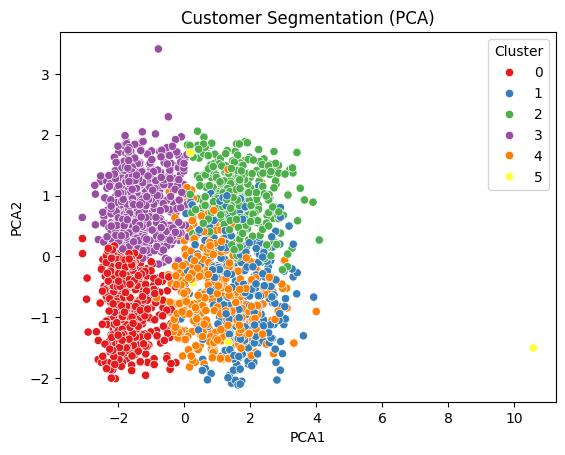

In [4097]:
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="Set1")
plt.title("Customer Segmentation (PCA)")
plt.show()

In [4098]:
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,Recency
Cluster,,,,,,
0,50.940840,32636.687023,92.545802,1.958015,3.087786,25.708015
1,46.731343,74309.734328,1354.904478,5.071642,9.274627,40.483582
2,63.249377,68787.648379,1139.204489,5.997506,8.511222,75.291771
3,55.540741,36903.040741,131.768519,2.442593,3.490741,74.924074
4,64.634804,60049.507353,758.870098,6.372549,6.926471,25.830882
5,52.500000,221604.500000,662.125000,0.500000,0.750000,48.625000


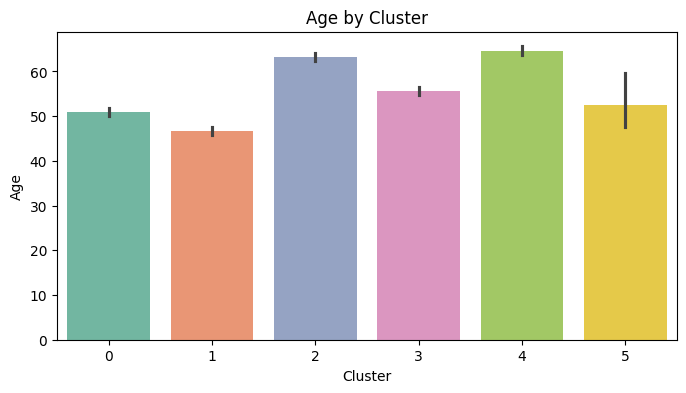

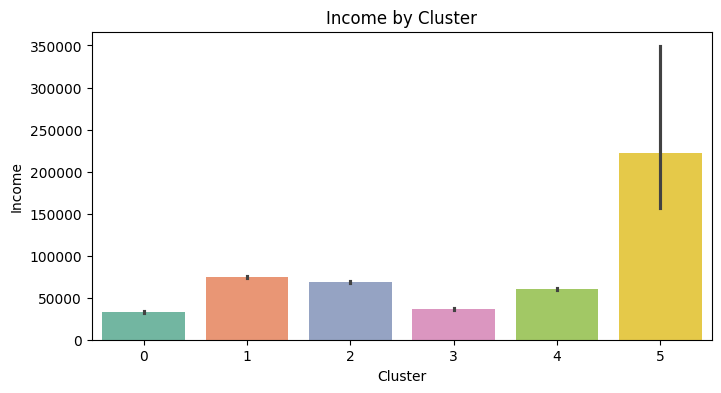

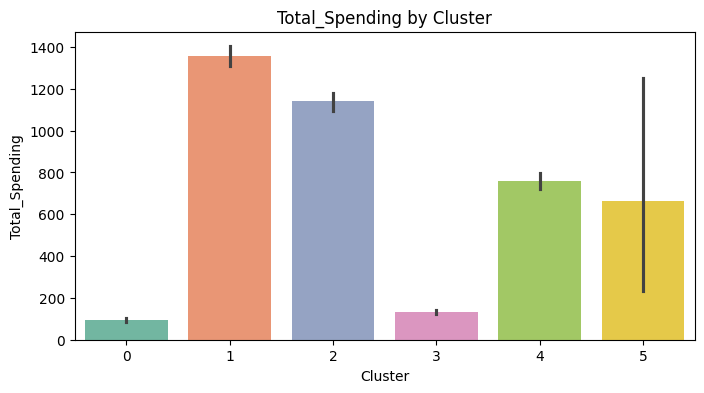

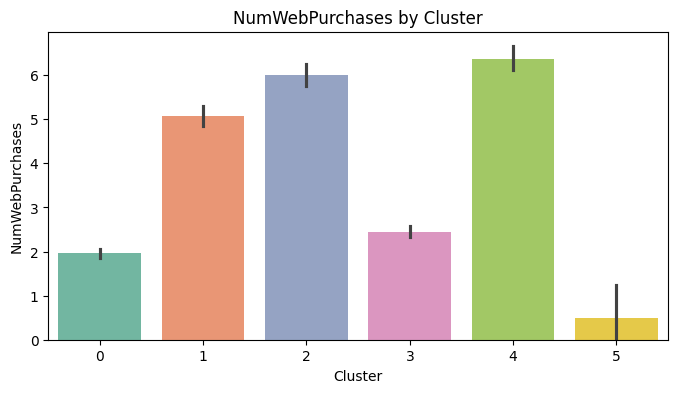

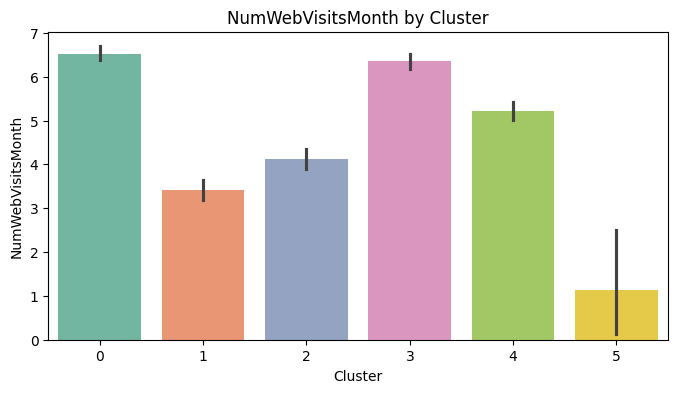

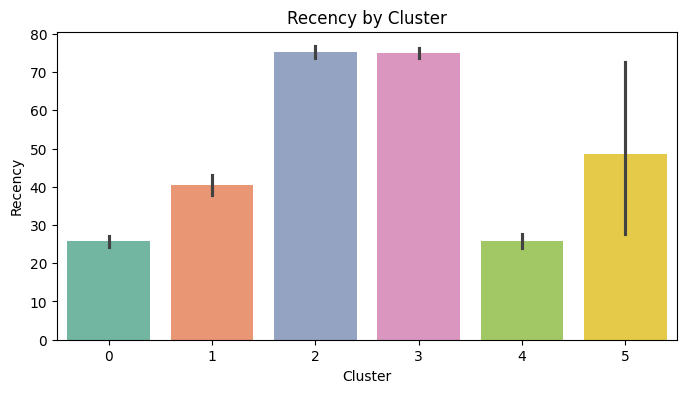

In [4099]:
features_to_plot = ["Age", "Income", "Total_Spending", "NumWebPurchases", "NumWebVisitsMonth", "Recency"]

for feature in features_to_plot:
    plt.figure(figsize=(8,4))
    sns.barplot(x="Cluster", y=feature, data=df, palette="Set2", hue="Cluster", legend=False)
    plt.title(f"{feature} by Cluster")
    plt.show()

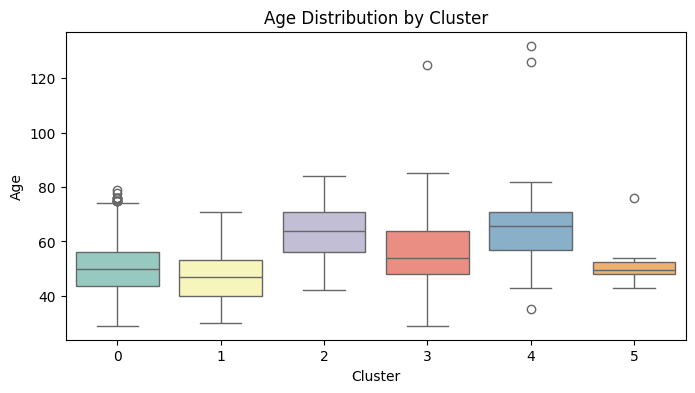

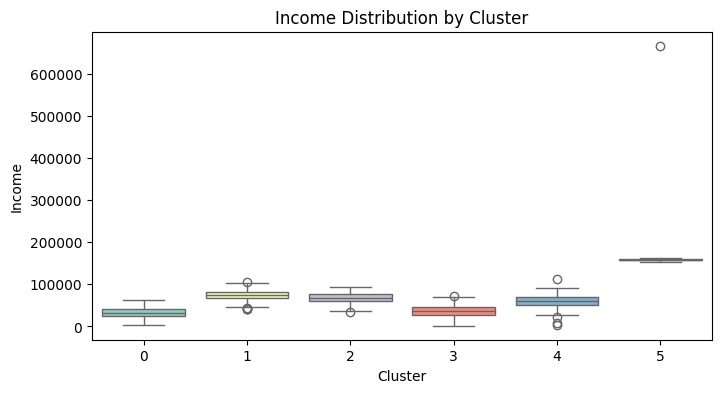

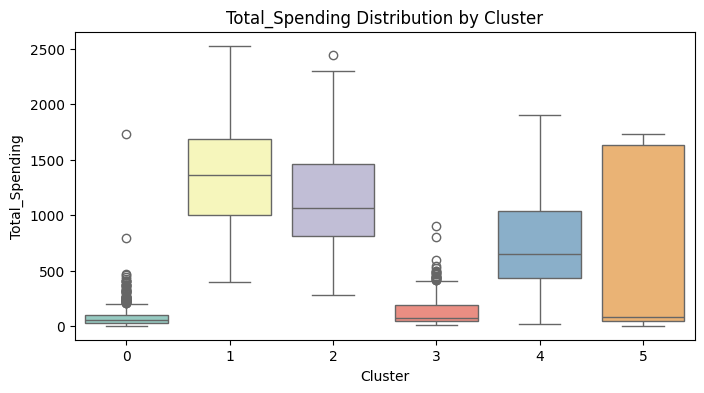

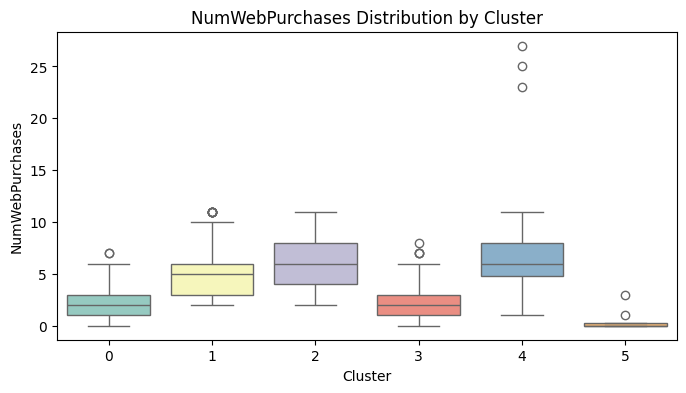

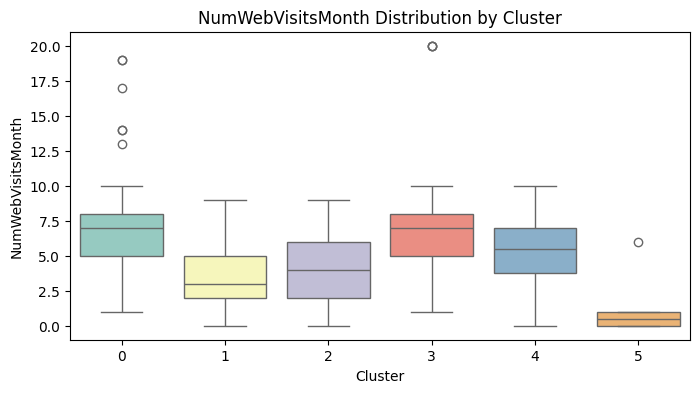

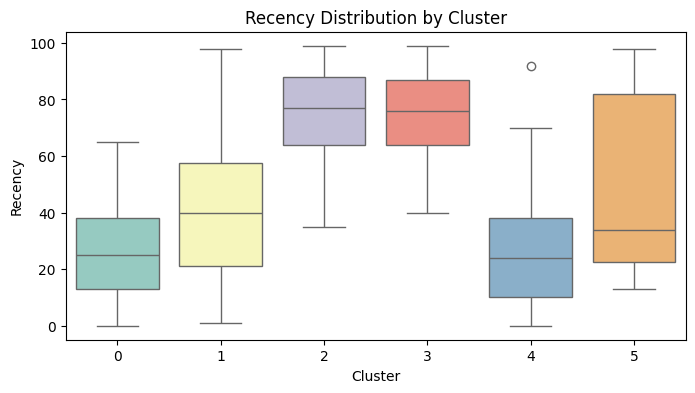

In [4100]:
for feature in features_to_plot:
    plt.figure(figsize=(8,4))
    sns.boxplot(x="Cluster", y=feature, data=df, palette="Set3", hue="Cluster", legend=False)
    plt.title(f"{feature} Distribution by Cluster")
    plt.show()